# Qualitative Dependent Variable Models

## Data Description

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib as mpl
import patsy as pt
    
import wooldridge as woo
wage2 = woo.dataWoo('wage2')
wage2 = woo.data('wage2')
wage2.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


In [2]:
wage2.describe()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [5]:
# Replace Null Value With Mean
m_b = wage2['brthord'].mean()
wage2['brthord'].fillna(value=m_b,inplace=True)

m_me = wage2['meduc'].mean()
wage2['meduc'].fillna(value=m_me,inplace=True)

m_f = wage2['feduc'].mean()
wage2['feduc'].fillna(value=m_f,inplace=True)

## Histograms and Density

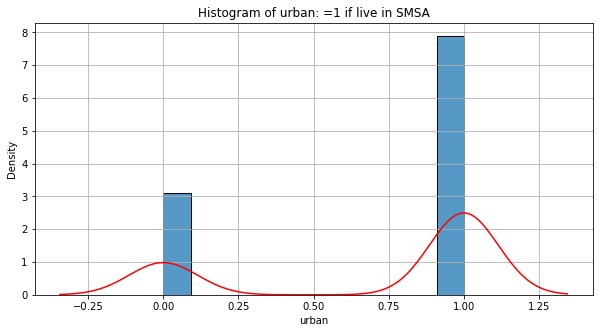

In [7]:
# Plotting urban histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of urban: =1 if live in SMSA")
sns.histplot(wage2.urban, stat = "density")
sns.kdeplot(wage2.urban, color = "red")
plt.grid(True)

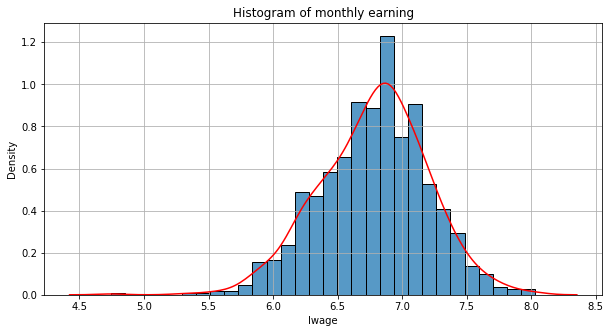

In [6]:
# Plotting lwage histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of monthly earning")
sns.histplot(wage2.lwage, stat = "density")
sns.kdeplot(wage2.lwage, color = "red")
plt.grid(True)

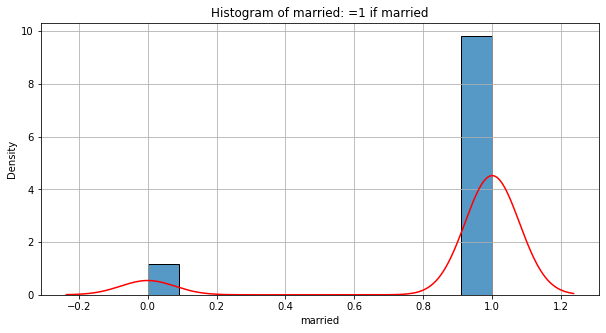

In [8]:
# Plotting married histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of married: =1 if married")
sns.histplot(wage2.married, stat = "density")
sns.kdeplot(wage2.married, color = "red")
plt.grid(True)

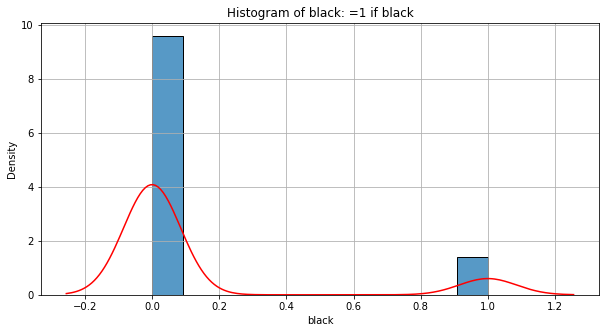

In [9]:
# Plotting black histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of black: =1 if black")
sns.histplot(wage2.black, stat = "density")
sns.kdeplot(wage2.black, color = "red")
plt.grid(True)

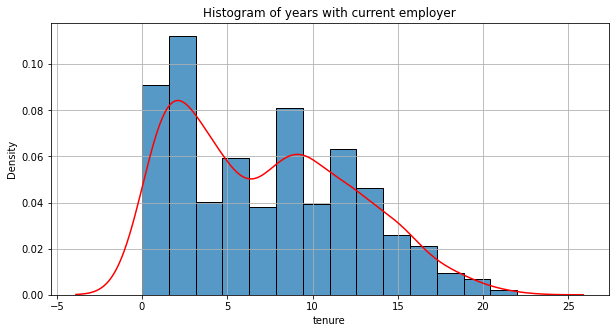

In [10]:
# Plotting tenure histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years with current employer")
sns.histplot(wage2.tenure, stat = "density")
sns.kdeplot(wage2.tenure, color = "red")
plt.grid(True)

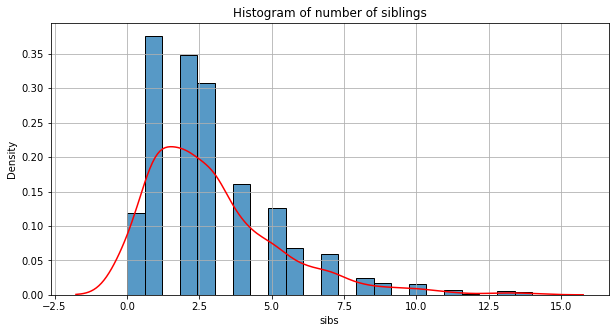

In [11]:
# Plotting sibs histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of number of siblings")
sns.histplot(wage2.sibs, stat = "density")
sns.kdeplot(wage2.sibs, color = "red")
plt.grid(True)

## Correlation Plot

<AxesSubplot:>

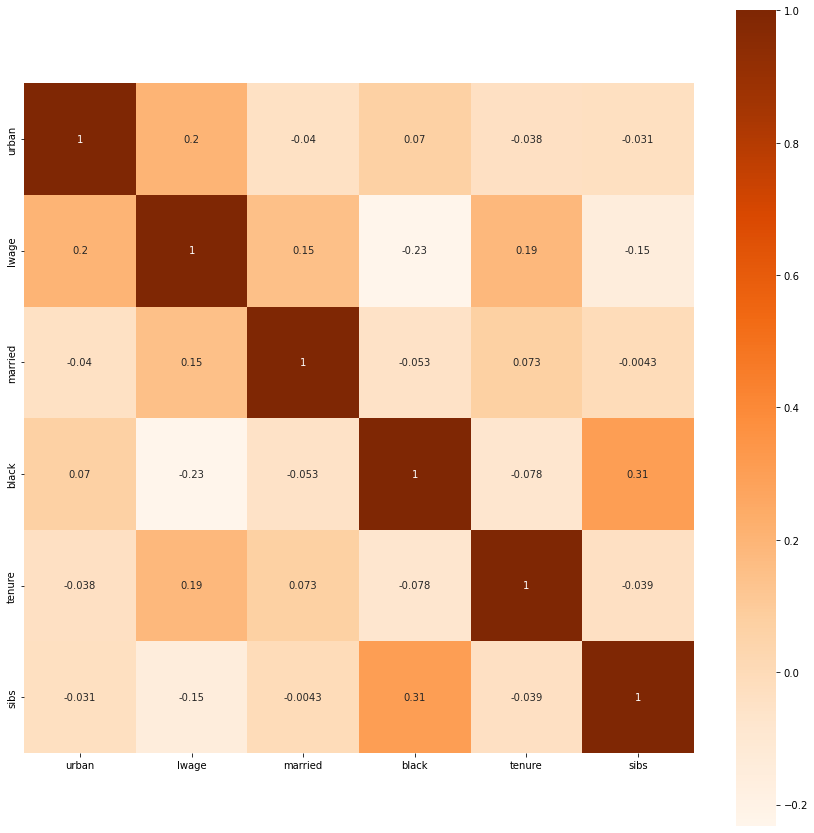

In [12]:
plt.figure(figsize=(15,15))
corr= wage2[['urban','lwage','married','black','tenure','sibs']].corr()
sns.heatmap(corr,cmap="Oranges",annot=True,square = True)

## Boxplot

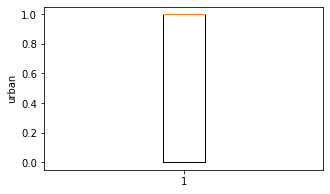

In [13]:
#Plotting Boxplot For urban
plt.figure(figsize=(5,3))
plt.boxplot(wage2.urban)
plt.ylabel("urban")
plt.show()

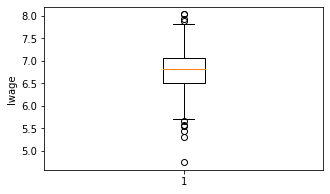

In [14]:
#Plotting Boxplot For lwage
plt.figure(figsize=(5,3))
plt.boxplot(wage2.lwage)
plt.ylabel("lwage")
plt.show()

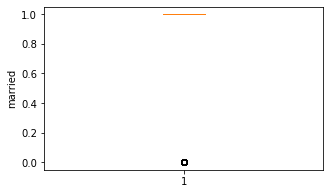

In [15]:
#Plotting Boxplot For married
plt.figure(figsize=(5,3))
plt.boxplot(wage2.married)
plt.ylabel("married")
plt.show()

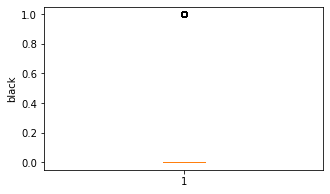

In [16]:
#Plotting Boxplot For black
plt.figure(figsize=(5,3))
plt.boxplot(wage2.black)
plt.ylabel("black")
plt.show()

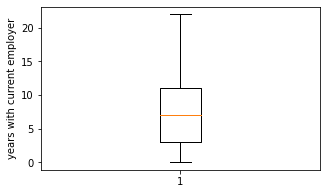

In [17]:
#Plotting Boxplot For tenure
plt.figure(figsize=(5,3))
plt.boxplot(wage2.tenure)
plt.ylabel("years with current employer")
plt.show()

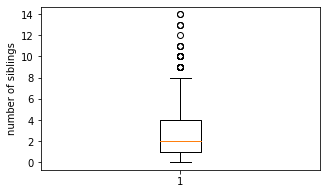

In [18]:
#Plotting Boxplot For sibs
plt.figure(figsize=(5,3))
plt.boxplot(wage2.sibs)
plt.ylabel("number of siblings")
plt.show()

## Scatter Plot

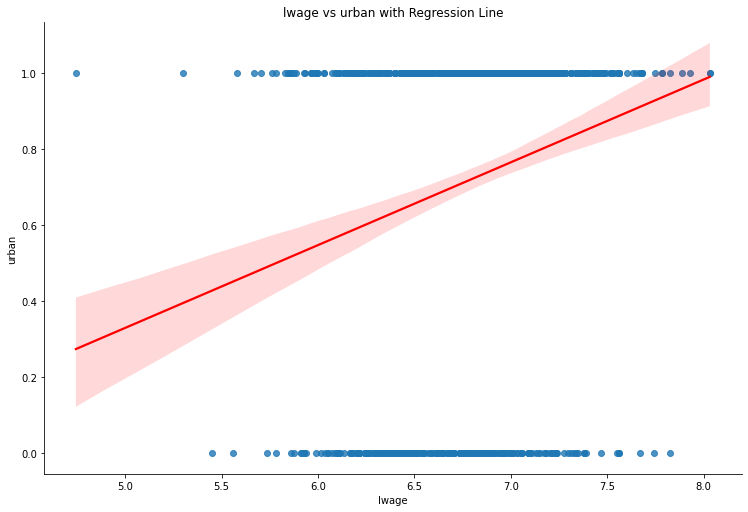

In [27]:
#Plotting Scatterplot for lwage against urban
sns.lmplot(data=wage2,x="lwage",y="urban",line_kws={"color":"red"},height=7,aspect=1.5)
plt.title("lwage vs urban with Regression Line")
plt.show()

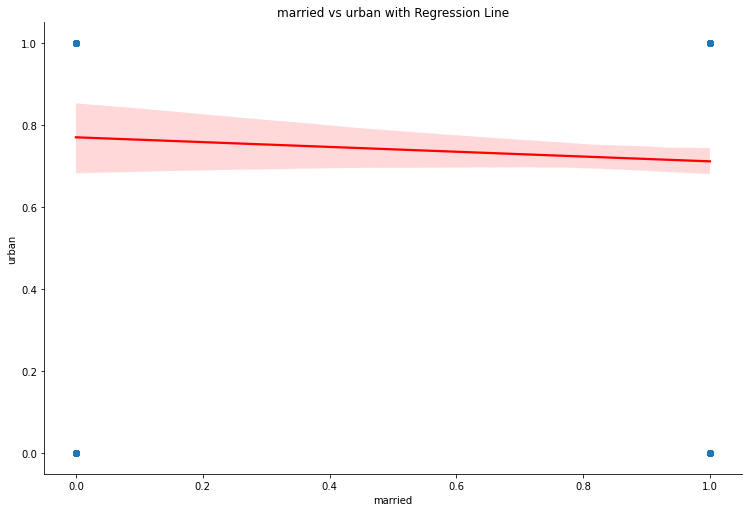

In [26]:
#Plotting Scatterplot for married against urban
sns.lmplot(data=wage2,x="married",y="urban",line_kws={"color":"red"},height=7,aspect=1.5)
plt.title("married vs urban with Regression Line")
plt.show()

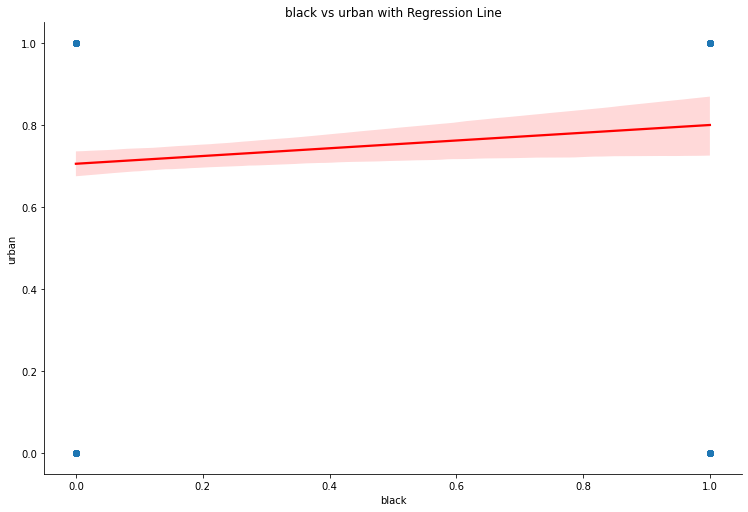

In [25]:
#Plotting Scatterplot for black against urban
sns.lmplot(data=wage2,x="black",y="urban",line_kws={"color":"red"},height=7,aspect=1.5)
plt.title("black vs urban with Regression Line")
plt.show()

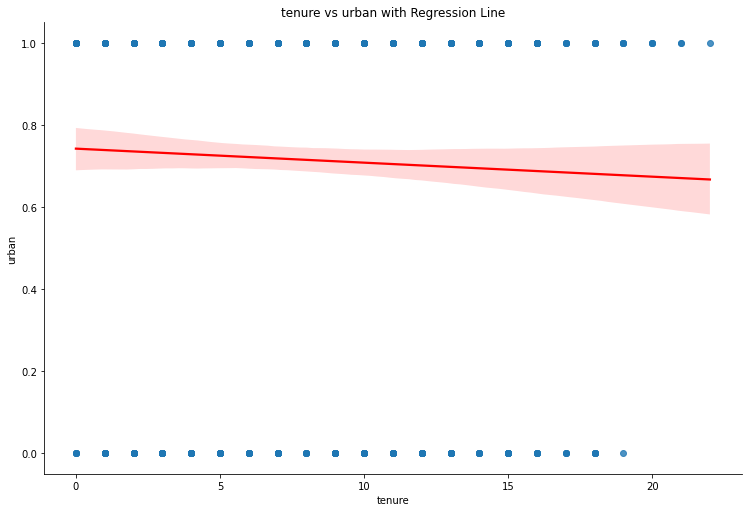

In [24]:
#Plotting Scatterplot for tenure against urban
sns.lmplot(data=wage2,x="tenure",y="urban",line_kws={"color":"red"},height=7,aspect=1.5)
plt.title("tenure vs urban with Regression Line")
plt.show()

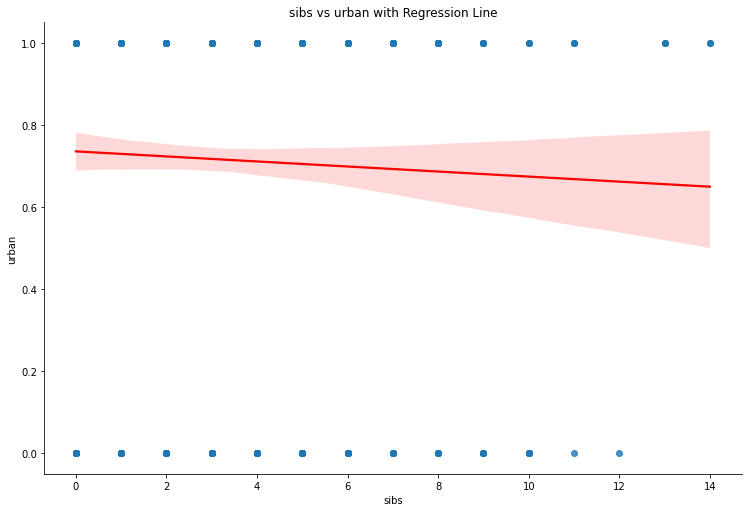

In [28]:
#Plotting Scatterplot for sibs against urban
sns.lmplot(data=wage2,x="sibs",y="urban",line_kws={"color":"red"},height=7,aspect=1.5)
plt.title("sibs vs urban with Regression Line")
plt.show()

## Statistical Summary

In [31]:
wage2.describe()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [33]:
wage2.isnull().any()

wage       False
hours      False
IQ         False
KWW        False
educ       False
exper      False
tenure     False
age        False
married    False
black      False
south      False
urban      False
sibs       False
brthord     True
meduc       True
feduc       True
lwage      False
dtype: bool

## Comments

The dependent variable is an indicator variable and two of the five independent variables are indicator variables. So the boxplot and scatter plot does not show much useful information on these variables. However, the histgrams and the correlation plot does show the distribution of a certain variable and it seems like all these variables have weak correlation with each other, which is good for our model.

## Model Fit

  0%|          | 0/10 [00:00<?, ?it/s]

2 attributes confirmed important: ['wage', 'lwage']
12 attributes confirmed unimportant: ['married', 'IQ', 'sibs', 'meduc', 'south', 'feduc', 'brthord', 'educ', 'hours', 'KWW', 'black', 'age']
2 tentative attributes remains: ['tenure', 'exper']


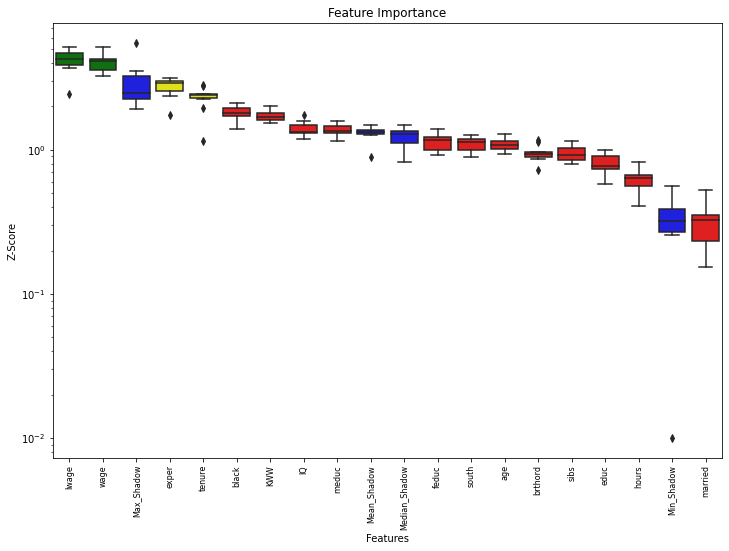

In [9]:
# y = 1 (lives in urban area), = 0 (otherwise)
# Estimate a linear probability model:
reg_lin = smf.ols(formula='urban ~ lwage + married + black +tenure + sibs',
                  data=wage2)
results_lin = reg_lin.fit(cov_type='HC3')

# Print regression table:
table = pd.DataFrame({'b': round(results_lin.params, 4),
                      'se': round(results_lin.bse, 4),
                      't': round(results_lin.tvalues, 4),
                      'pval': round(results_lin.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
                b      se       t    pval
Intercept -1.0191  0.2551 -3.9948  0.0001
lwage      0.2727  0.0378  7.2061  0.0000
married   -0.0974  0.0446 -2.1837  0.0290
black      0.1618  0.0408  3.9626  0.0001
tenure    -0.0064  0.0029 -2.1954  0.0281



In [10]:
# Estimate a probit model:
reg_probit = smf.probit(formula='urban ~ lwage + married + black +tenure +sibs',data=wage2)
results_probit = reg_probit.fit(disp=0)
print(f'results_probit.summary(): \n{results_probit.summary()}\n')

# log likelihood value:
print(f'results_probit.llf: {results_probit.llf}\n')

# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:                  urban   No. Observations:                  935
Model:                         Probit   Df Residuals:                      930
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.05712
Time:                        13:22:14   Log-Likelihood:                -524.69
converged:                       True   LL-Null:                       -556.48
Covariance Type:            nonrobust   LLR p-value:                 5.150e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7516      0.759     -6.257      0.000      -6.240      -3.263
lwage          0.8439      0.115      7.365      0.000       0.619       1.068
married       -0.3065    

In [11]:

# Estimate a logit model:
#reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
reg_logit = smf.logit(formula='urban ~ lwage + married + black +tenure + sibs', data=wage2)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

# log likelihood value:
print(f'results_logit.llf: {results_logit.llf}\n')

# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                  urban   No. Observations:                  935
Model:                          Logit   Df Residuals:                      930
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.05742
Time:                        13:22:17   Log-Likelihood:                -524.52
converged:                       True   LL-Null:                       -556.48
Covariance Type:            nonrobust   LLR p-value:                 4.368e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1829      1.330     -6.152      0.000     -10.790      -5.576
lwage          1.4470      0.203      7.138      0.000       1.050       1.844
married       -0.5283     

## Prediction Comparison

In [15]:
# Linear
reg_lin = smf.ols(formula='urban ~ lwage + married + black +tenure +sibs',
                  data=wage2)
results_lin = reg_lin.fit(cov_type='HC3')

# Logit
reg_logit = smf.logit(formula='urban ~ lwage + married + black +tenure + sibs',
                      data=wage2)
results_logit = reg_logit.fit(disp=0)

# Probit
reg_probit = smf.probit(formula='urban ~ lwage + married + black +tenure + sibs',
                      data=wage2)
results_probit = reg_probit.fit(disp=0)

# predictions for two "extreme" cases:
X_new = pd.DataFrame(
    { 'lwage': [5, 8],
     'married': [0, 0], 'black': [1, 1],
     'tenure': [0, 22], 'sibs':[14,0]})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

print(f'predictions_lin: \n{predictions_lin}\n')
print(f'predictions_logit: \n{predictions_logit}\n')
print(f'predictions_probit: \n{predictions_probit}\n')

predictions_lin: 
0    0.445932
1    1.212022
dtype: float64

predictions_logit: 
0    0.406269
1    0.974092
dtype: float64

predictions_probit: 
0    0.420607
1    0.984478
dtype: float64



## Plots of Prediction

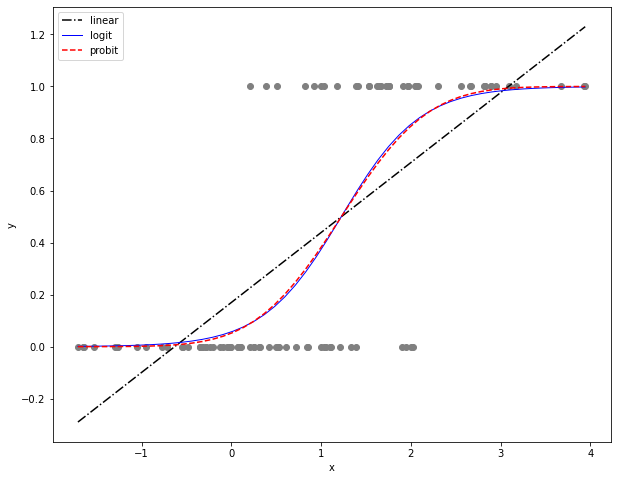

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# set the random seed:
np.random.seed(1234567)

y = stats.binom.rvs(1, 0.5, size=100)
x = stats.norm.rvs(0, 1, size=100) + 2 * y
sim_data = pd.DataFrame({'y': y, 'x': x})

# estimation:
reg_lin = smf.ols(formula='y ~ x', data=sim_data)
results_lin = reg_lin.fit()
reg_logit = smf.logit(formula='y ~ x', data=sim_data)
results_logit = reg_logit.fit(disp=0)
reg_probit = smf.probit(formula='y ~ x', data=sim_data)
results_probit = reg_probit.fit(disp=0)

# prediction for regular grid of x values:
X_new = pd.DataFrame({'x': np.linspace(min(x), max(x), 50)})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

# scatter plot and fitted values:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x, y, color='grey', marker='o', linestyle='')
plt.plot(X_new['x'], predictions_lin,
         color='black', linestyle='-.', label='linear')
plt.plot(X_new['x'], predictions_logit,
         color='blue', linestyle='-', linewidth=1, label='logit')
plt.plot(X_new['x'], predictions_probit,
         color='red', linestyle='--', label='probit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()